In [6]:
import pandas as pd
import movie_database_methods as imd
import numpy as np
import get_imdb
import seaborn as sns

In [7]:
imdb = get_imdb.get_imdb()

tn = imd.tn_movie_budgets()

In [8]:
unique_genres= ['Action','Crime','Drama','Biography','Comedy','Fantasy','Horror','Thriller','Adventure','Animation',
'Documentary','History','Mystery','Sci-Fi','Romance','Family','War','Music','Sport','Western','Musical']

In [9]:
combined = imd.movies_combined(tn,imdb)

### Further Data Cleaning

In [10]:
# Limit to Movies that have been released

combined = combined.loc[combined['start_year'] < 2019]

In [11]:
# Drop non-relevant genre columns

combined.drop(columns = ['News','Adult','Talk-Show','Reality-TV','Game-Show','Short'], inplace = True)

### Add Number of Genres Column

In [12]:
combined['num_genres'] = combined.genres.map(lambda x: len(x))

### Percent of Total Revenue by Genre Analysis

In [13]:
total_revenue = combined.domestic_gross.sum()

In [14]:
genre_percent_revenue = pd.Series()

percent_revenues = []

for genre in unique_genres:
    # Subset dataframe based on genre
    subset_by_genre = combined.loc[combined[genre] == 'True']
    # Weight the revenue by dividing by the number of genres of movie
    weighted_revenue = subset_by_genre.domestic_gross/subset_by_genre.num_genres
    percent_of_total = weighted_revenue.sum()/total_revenue*100
    percent_revenues.append(percent_of_total)

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [15]:
percent_revenue_by_genre = pd.DataFrame(percent_revenues, unique_genres).reset_index()
percent_revenue_by_genre.columns = ['genre', 'percent_revenue']
percent_revenue_by_genre.percent_revenue.sum()

0.0

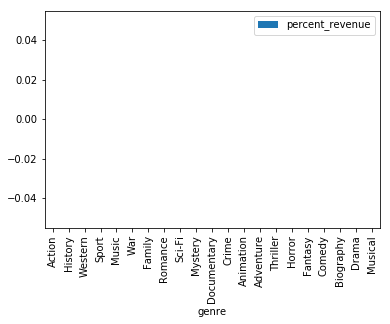

In [16]:
percent_revenue_by_genre.sort_values(by = 'percent_revenue', ascending = False).plot(kind = 'bar', x = 'genre')

### Percent of Total Profit by Genre Analysis

In [17]:
#Calucate Profit for Each Row

combined['profit'] = (combined.domestic_gross - combined.production_budget)

In [18]:
#Calculate Total Profit

total_profit = combined['profit'].sum()

In [19]:
percent_profits = []

for genre in unique_genres:
    #Subset dataframe based on genre
    subset_by_genre = combined.loc[combined[genre] == 'True']
    #Weight the profit by dividing by the number of genres of movie
    weighted_profit = sum(subset_by_genre.profit/subset_by_genre.num_genres)
    percent_profit = weighted_profit/total_profit*100
    #norm_profit = weighted_profit.sum()/len(sub_by_genre)
    percent_profits.append(percent_profit)

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [20]:
percent_profits_by_genre = pd.DataFrame(percent_profits, unique_genres).reset_index()
percent_profits_by_genre.columns = ['genre', 'percent_profit']
percent_profits_by_genre.percent_profit.sum()

0.0

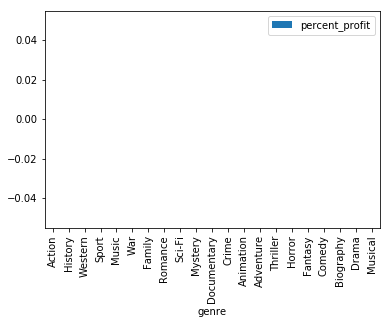

In [21]:
percent_profits_by_genre.sort_values(by = 'percent_profit', ascending = False).plot(kind = 'bar', x = 'genre')

### Profit per Movie by Genre Analysis

In [22]:
profit_per_movie = []


for genre in unique_genres:
    #Subset dataframe based on genre
    subset_by_genre = combined.loc[combined[genre] == 'True']
    movie_profit = subset_by_genre.profit
    movie_profits = []
    movie_profits.append(movie_profit)
        #Return the mean of profits for movies of a certain genre
    profit_per_movie.append(np.mean(movie_profit))

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [23]:
percent_profits_by_genre = pd.DataFrame(profit_per_movie, unique_genres).reset_index()
percent_profits_by_genre.columns = ['genre', 'profit_per_movie']

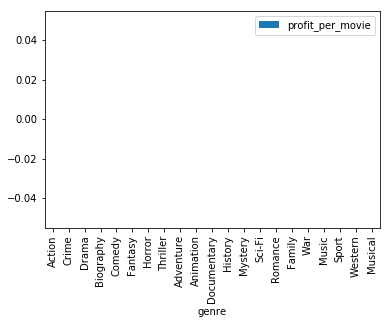

In [24]:
percent_profits_by_genre.sort_values(by = 'profit_per_movie', ascending = False).plot(kind = 'bar', x = 'genre')

### Return on Budget by Genre Analysis

In [25]:
return_on_budget = []


for genre in unique_genres:
    #Subset dataframe based on genre
    subset_by_genre = combined.loc[combined[genre] == 'True']
    #Calculate return on budget
    movie_return_on_budget = subset_by_genre.profit/subset_by_genre.production_budget*100
    movie_return_on_budgets = []
    movie_return_on_budgets.append(movie_return_on_budget)
    #Return the mean of return on budgets for movies of a certain genre
    return_on_budget.append(np.mean(movie_return_on_budgets))

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
return_on_budget_by_genre = pd.DataFrame(return_on_budget, unique_genres).reset_index()
return_on_budget_by_genre.columns = ['genre', 'return_on_budget']

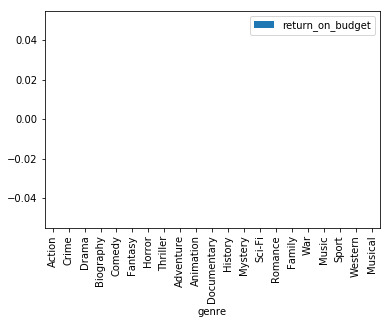

In [27]:
return_on_budget_by_genre.sort_values(by = 'return_on_budget', ascending = False).plot(kind = 'bar', x = 'genre')